In [29]:
from twython import Twython
import pandas as pd
import urllib.request
import requests
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

import nltk 
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.model_selection import train_test_split
from nltk.classify import NaiveBayesClassifier, DecisionTreeClassifier
from nltk.classify.util import accuracy
from sklearn.metrics import recall_score, precision_score, f1_score, auc, roc_curve, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure)
from sklearn import tree
from nltk.probability import FreqDist




from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

In [30]:
api_key = "E4gKgg7EfQbyvtlf2uw8kiV10"
api_secret = "DHb13KrVAZkw2UaP0fK2rBfSlCdbTlsRUglU1sTcKvuqE5JP0W"
access_token_key = "3431616532-66IMvK3ufkVEW9YfPqxayYBUU9iuphO1hWgwVpx"
access_token_secret = "xDohSnZRR6tjVsKd38nky62biq03rjh9Lk4iAMXXVJ5u0"

In [31]:
def txt_preprocess(s):
    r = []
    words = word_tokenize(str(s))
    clean_words = [word.lower() for word in words if word not in set(string.punctuation)]
    english_stops = set(stopwords.words('english'))
    clean_words = [word for word in clean_words if word not in english_stops]
    clean_words = ' '.join(word for word in clean_words if not word.isdigit())
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in clean_words.split()]
    return lemma_list

t = Twython(app_key=api_key, app_secret=api_secret, oauth_token=access_token_key, 
           oauth_token_secret=access_token_secret)

In [32]:
w1 = t.search(q='cvs receipts',count=1000,get_authentication_tokens=True)['statuses']
w2 = t.search(q='cvs', count =1000,get_authentication_tokens=True)['statuses']
#crime_tweets = pd.DataFrame(w1+w2)['text'].apply(txt_preprocess)
cvs_tweets = pd.DataFrame(w1+w2)['text'].apply(txt_preprocess)

In [33]:
print(cvs_tweets)

0                  [peterspadafore, cv, length, receipt]
1         [rt, himooch, cv, need, jailed, long, receipt]
2      [rt, psdnfitness, dixiechicks, got, receipt, w...
3      [dixiechicks, got, receipt, would, make, cv, b...
4         [rt, himooch, cv, need, jailed, long, receipt]
                             ...                        
195    [got, hit, wearing, mask, trying, pick, packag...
196    [ele, tem, hábito, de, cv, com, sentimento, .....
197                      [tensei_aroe, ついにミラティブデビューですかぁ]
198    [minha, cv, com, alvarinho, deixou, bem, trist...
199    [será, q, alguém, um, dia, vai, postar, cv, cm...
Name: text, Length: 200, dtype: object


In [7]:
crime_tweets

0      [rt, orbitdesignlab, michaelmalice, n't, recei...
1      [buhbuhbrandonn, dude, source, away, cv, type,...
2         [rt, himooch, cv, need, jailed, long, receipt]
3         [rt, himooch, cv, need, jailed, long, receipt]
4         [rt, himooch, cv, need, jailed, long, receipt]
                             ...                        
195    [cv, store, probably, use, receipt, measure, ’...
196    [formerlyformer, morlockp, get, incoherent, cv...
197    [rt, kevinmkruse, trump, may, trotted, head, c...
198    [anthonyhansen, samelnicomposer, cv, confusing...
199    [lztcntrrs, ’, okay, friendo, cv, receipt, lon...
Name: text, Length: 200, dtype: object

In [34]:

fdist1 = FreqDist(nltk.tokenize.word_tokenize(str(cvs_tweets)))

fdist1.most_common(50)

[(',', 56),
 ('[', 10),
 ('cv', 7),
 ('...', 7),
 ('receipt', 5),
 (']', 4),
 ('rt', 3),
 ('got', 3),
 (':', 3),
 ('himooch', 2),
 ('need', 2),
 ('jailed', 2),
 ('long', 2),
 ('dixiechicks', 2),
 ('com', 2),
 ('0', 1),
 ('peterspadafore', 1),
 ('length', 1),
 ('1', 1),
 ('2', 1),
 ('psdnfitness', 1),
 ('w', 1),
 ('3', 1),
 ('would', 1),
 ('make', 1),
 ('b', 1),
 ('4', 1),
 ('195', 1),
 ('hit', 1),
 ('wearing', 1),
 ('mask', 1),
 ('trying', 1),
 ('pick', 1),
 ('packag', 1),
 ('196', 1),
 ('ele', 1),
 ('tem', 1),
 ('hábito', 1),
 ('de', 1),
 ('sentimento', 1),
 ('..', 1),
 ('197', 1),
 ('tensei_aroe', 1),
 ('ついにミラティブデビューですかぁ', 1),
 ('198', 1),
 ('minha', 1),
 ('alvarinho', 1),
 ('deixou', 1),
 ('bem', 1),
 ('trist', 1)]

In [16]:
cvs=str(crime_tweets)
cvs

"0      [rt, orbitdesignlab, michaelmalice, n't, recei...\n1      [buhbuhbrandonn, dude, source, away, cv, type,...\n2         [rt, himooch, cv, need, jailed, long, receipt]\n3         [rt, himooch, cv, need, jailed, long, receipt]\n4         [rt, himooch, cv, need, jailed, long, receipt]\n                             ...                        \n195    [cv, store, probably, use, receipt, measure, ’...\n196    [formerlyformer, morlockp, get, incoherent, cv...\n197    [rt, kevinmkruse, trump, may, trotted, head, c...\n198    [anthonyhansen, samelnicomposer, cv, confusing...\n199    [lztcntrrs, ’, okay, friendo, cv, receipt, lon...\nName: text, Length: 200, dtype: object"

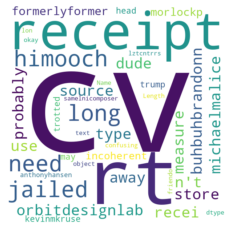

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(min_font_size=16, max_words=100, background_color="white",width=600,height=600).generate(cvs)

plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
wc.to_file("cvs_wc.png")

## Malicious URL & Phishing Data

In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html))'}
Phish_URL = []
url = "http://www.google.com/"
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)

for i in range(0,100):
    url2 = 'https://www.phishtank.com/phish_search.php?page=' + str(i) + '&valid=y&Search=Search'  
    response = requests.get(url2, headers=headers, verify=False).text
    soup = BeautifulSoup(response, "html.parser")
    blocks = soup.find_all('table', attrs= {'class':'data'})
    
    for block in blocks:
        Phish_URL.extend(soup.find_all('tr', attrs= {'style':'background: #ffffcc;'})) 

ds = pd.DataFrame({"Phishing URL's": Phish_URL})

#rr = pd.DataFrame({'Ratings': ratings[10:410], 'Reviews':rev})
ds.to_csv("Phishing URL's.csv")

In [ ]:
ds

In [ ]:
from scipy.io import arff

data = arff.loadarff('Phishing_Legitimate_full.arff')
df = pd.DataFrame(data[0])
df